In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

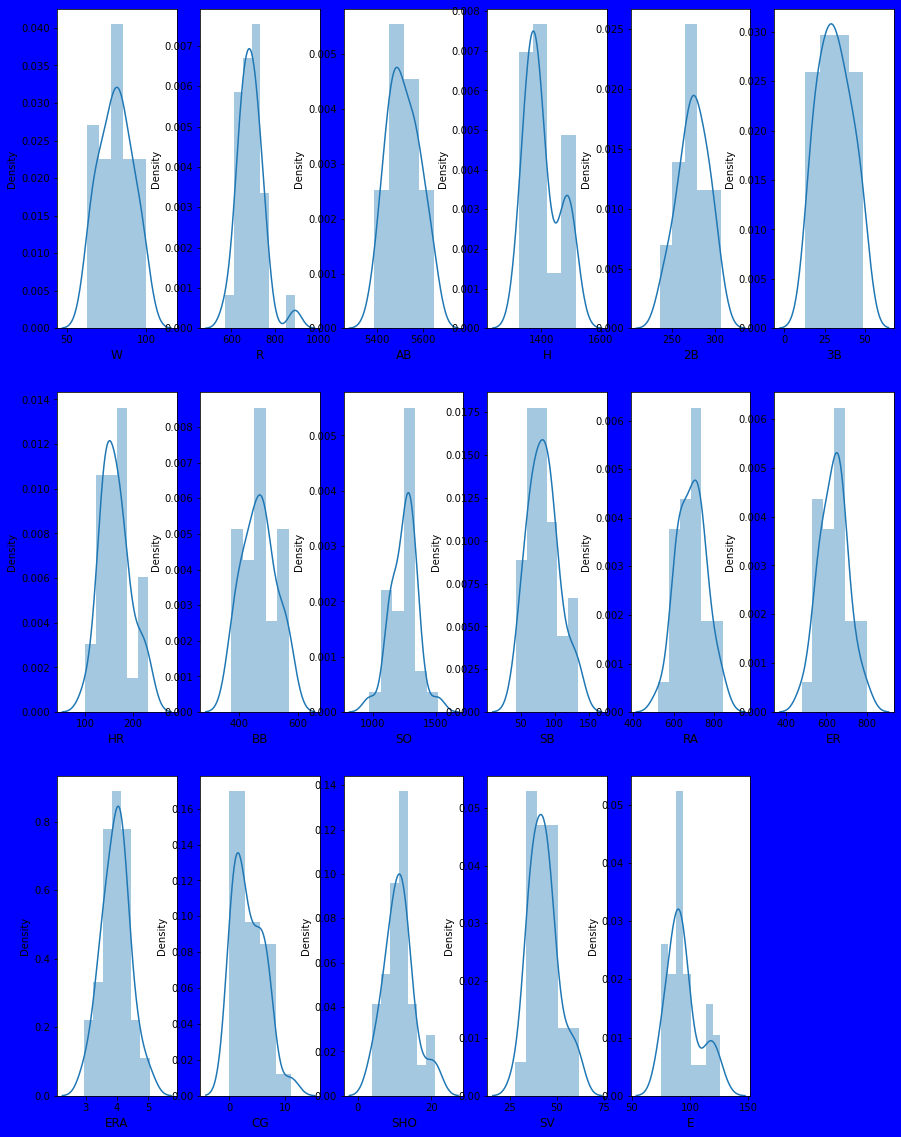

In [8]:
plt.figure(figsize=(15,20),facecolor="Blue")

plotnumber=1

for i in data:
    if plotnumber<18:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=12)
     
    plotnumber+=1 
    
plt.show()

In [9]:
df_corr=data.corr().abs()

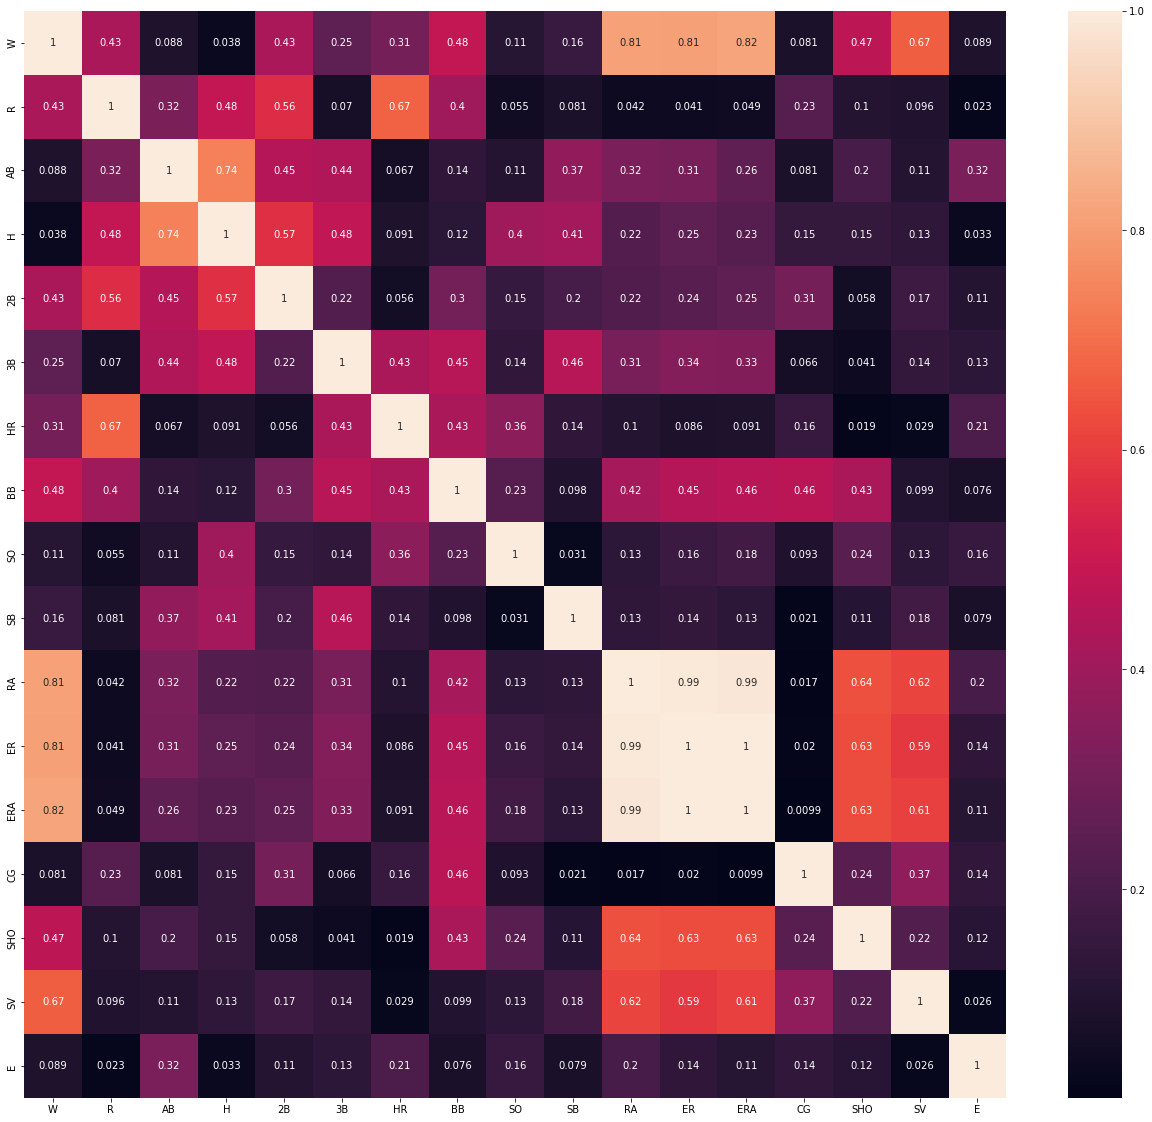

In [10]:
plt.figure(figsize=(22,20))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaled=StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
x=data.drop('W',axis=1)
y=data.W

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
best_feature=SelectKBest(score_func=f_classif,k=12)

In [18]:
fit=best_feature.fit(x,y)

In [19]:
df_score=pd.DataFrame(fit.scores_)

In [20]:
df_columns=pd.DataFrame(x.columns)

In [21]:
feature_score=pd.concat([df_columns,df_score],axis=1)

In [22]:
feature_score.columns=['Feature_Name','Score']

In [23]:
print(feature_score.nlargest(12,'Score'))

   Feature_Name     Score
0             R  4.325471
8            SB  3.145176
14           SV  2.966365
9            RA  2.420967
15            E  2.403946
11          ERA  1.665038
10           ER  1.574876
1            AB  1.552727
7            SO  1.509218
13          SHO  1.204067
6            BB  1.048384
5            HR  0.989166


In [24]:
new_x=data[['R','SB','SV','RA','E','ERA','ER','AB','SO','SHO','BB','HR']]

In [25]:
new_scaled=scaled.fit_transform(new_x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(new_scaled,y,test_size=0.20,random_state=15)

In [32]:
reg=LinearRegression()

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=reg.predict(x_test)

In [35]:
score=reg.score(x_test,y_test)

In [36]:
score

0.7558793745173751

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mean_squared_error(y_test,y_pred)

31.708556798798725

In [39]:
mean_absolute_error(y_test,y_pred)

4.379677257552042